# Analyzing recommendation letters with CorrNet

## Importing the package

In [1]:
import corrnet

## Loading the letter data

In [26]:
letter_manager = corrnet.LetterManager('data/letter_data.csv', date_col='Date',
                                       sender_col='Sender', addressee_col='Receiver',
                                       attribute_cols=['Written for', 'Institution', 'Recommendation Type', 'Success'], show_warnings=True)

## Plotting the date distribution split by institutions

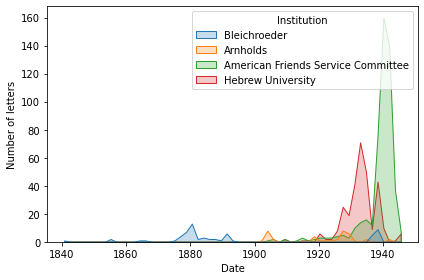

In [31]:
_ = letter_manager.plot_date_distribution(split_attribute='Institution', save_as='date-distr.pdf')

## Displaying numbers of letters split by institution

In [33]:
letter_manager.letter_data().value_counts('Institution', dropna=False)

Institution
American Friends Service Committee    505
Hebrew University                     297
Bleichroeder                           61
Arnholds                               39
NaN                                     1
dtype: int64

## Displaying numbers of letters split by success status

In [34]:
letter_manager.letter_data().value_counts('Success', dropna=False)

Success
NaN      606
True     150
False    147
dtype: int64

## Constructing networks for letters targeting the HU

In [6]:
digraph_hu, multi_digraph_hu, line_graph_hu = letter_manager.construct_graphs(filter_by=('Institution', 'Hebrew University'))

## Computing some network properties

In [35]:
corrnet.compute_network_properties(digraph_hu, multi_digraph_hu, line_graph_hu)

,Network type,Num nodes,Num edges,Num WCCs,Size LWCC
0,Digraph,297,3117,65,223
1,Multi-digraph,241,297,24,163
2,Directed line graph,297,3117,65,223
3,Undirected line graph,297,3054,65,223


## Differential in-centrality analysis

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:1.803e-04 U_stat=2.676e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:1.024e-04 U_stat=2.150e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:1.029e-04 U_stat=2.637e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True:

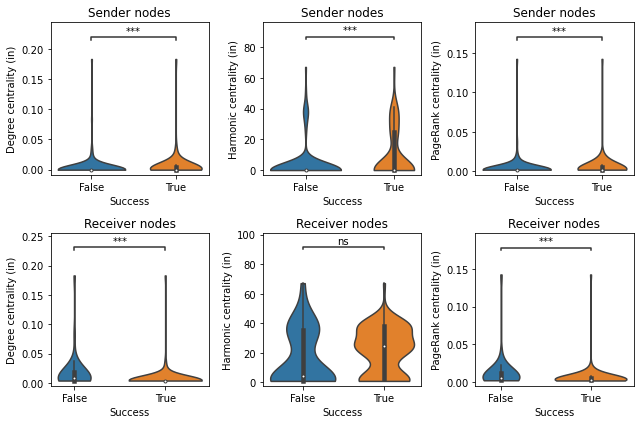

In [8]:
_ = corrnet.differential_centrality_analysis(digraph_hu, multi_digraph_hu, 'Success', 'in', save_as='in-centrality-analysis-hu.pdf')

## Differential out-centrality analysis

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-03 U_stat=3.006e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:2.341e-01 U_stat=1.764e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:6.052e-02 U_stat=3.048e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True:

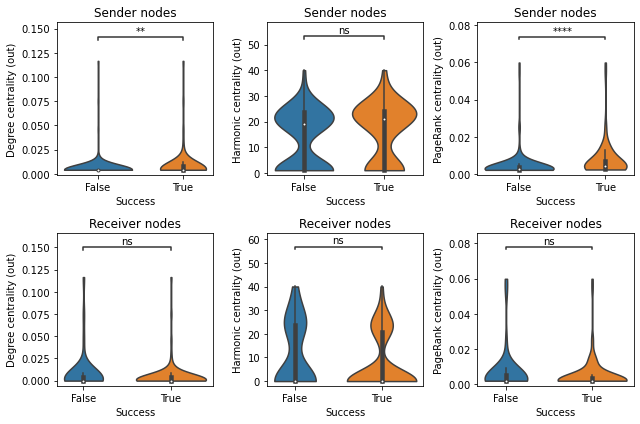

In [9]:
_ = corrnet.differential_centrality_analysis(digraph_hu, multi_digraph_hu, 'Success', 'out', save_as='out-centrality-analysis-hu.pdf')

## Semi-supervised analysis

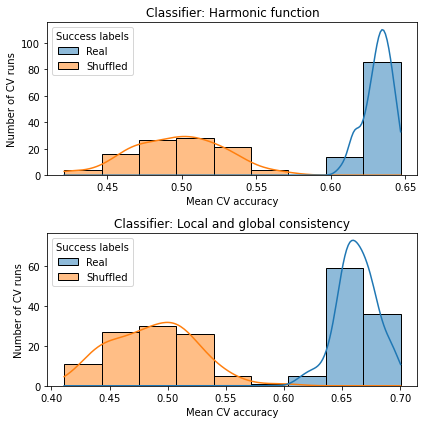

In [10]:
_ = corrnet.semi_supervised_analysis(line_graph_hu, 'Success', save_as='semi-supervised-analysis-hu.pdf')